In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow.compat.v1 as tf

In [13]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
from sklearn.datasets import *
from sklearn.preprocessing import minmax_scale

In [3]:
features,target = make_blobs(n_samples = 500,n_features=2,centers=2,random_state=75,cluster_std = 5)

In [4]:
features = minmax_scale(features)
k = int(len(features)*0.6)

In [5]:
X_train,Y_train = features[0:k,:],target[0:k]
X_test,Y_test = features[k:,:],target[k:]

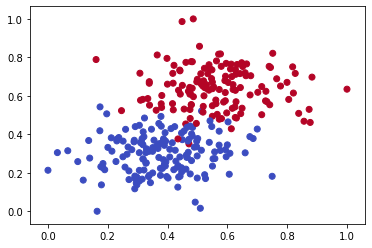

In [6]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")
plt.show()

In [7]:
# Define data size and batch size
n_samples = 1000 
batch_size = 100
n_features = 2

(0, 1)

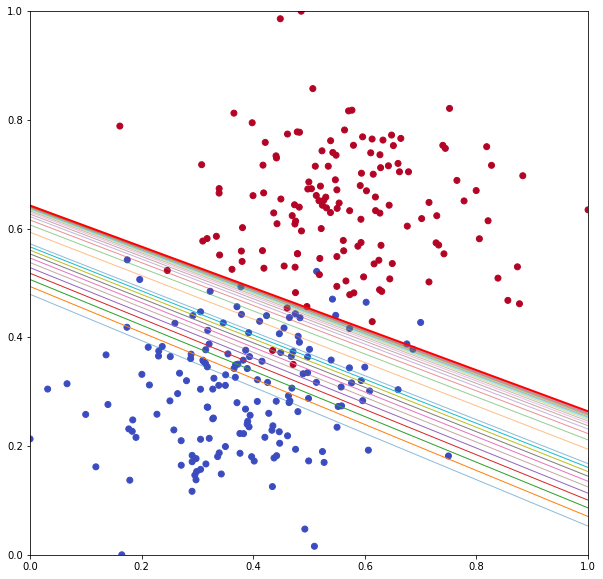

In [113]:
x_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(Y_train).float().to(device)

torch.manual_seed(42)
W = torch.zeros((2,1), dtype=torch.float).to(device)
b = torch.zeros(1, dtype=torch.float).to(device)
W.requires_grad_()
b.requires_grad_()

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD([W, b], lr=0.1)

f,ax = plt.subplots(figsize = (10,10))
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")

for epoch in range(500):
    y_hat = torch.mm(x_train_tensor,W) + b
    #sigmoid = nn.LogSigmoid()
    #y_hat = sigmoid(y_hat)
    
    
    #print (np.sum(y_hat.detach().numpy() < 0))
    #print (y_hat)
    
    loss = loss_fn(y_hat, y_train_tensor.reshape(-1,1))
    
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
    def linear_disc(x1,wx1,wx2,bias):
            return (-wx1*x1 + (-bias))/(wx2)
    
    Weight_X1,Weight_X2 = W.detach().numpy()
    B = b.detach().numpy()[0]
    
    
    
    g = np.linspace(0,1,10)
    gp = linear_disc(g,Weight_X1[0],Weight_X2[0],B)
    
    if epoch % 25 == 0:
            plt.plot(g,gp, linewidth = 1, alpha = 0.5)
    elif epoch < 50:
        if epoch % 5 == 0:
            plt.plot(g,gp, linewidth = 1)
        
plt.plot(g,gp, linewidth = 2, alpha = 1, c = 'r')
plt.xlim([0,1])
plt.ylim([0,1])

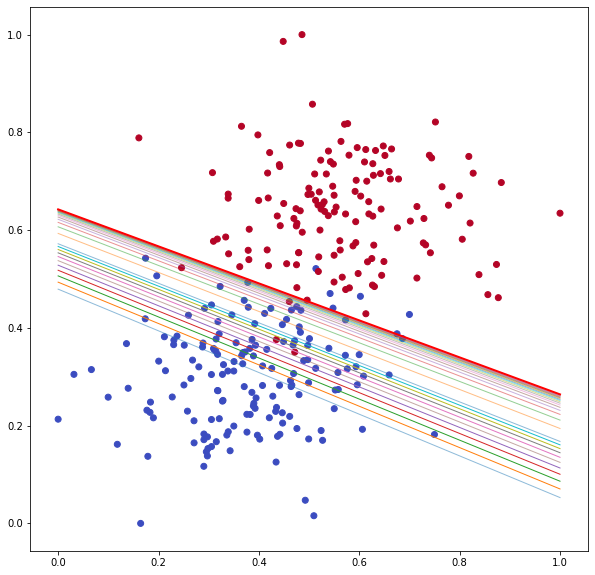

In [112]:
x_train_tensor = torch.from_numpy(X_train).float().to(device)
y_train_tensor = torch.from_numpy(Y_train).float().to(device)

torch.manual_seed(42)
W = torch.zeros((2,1), dtype=torch.float).to(device)
b = torch.zeros(1, dtype=torch.float).to(device)
W.requires_grad_()
b.requires_grad_()

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD([W, b], lr=0.1)

f,ax = plt.subplots(figsize = (10,10))
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")

for epoch in range(500):
    y_hat = torch.mm(x_train_tensor,W) + b
    sigmoid = nn.Sigmoid()
    y_hat = sigmoid(y_hat)
    
    
    #print (np.sum(y_hat.detach().numpy() < 0))
    #print (y_hat)
    
    R = y_train_tensor.reshape(-1,1)
    
    error = (
        -(
           (R*torch.log(y_hat)) + ((1-R)*(torch.log(1-y_hat)))
        )
    )
    
    loss = error.mean()
    
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
    def linear_disc(x1,wx1,wx2,bias):
            return (-wx1*x1 + (-bias))/(wx2)
    
    Weight_X1,Weight_X2 = W.detach().numpy()
    B = b.detach().numpy()[0]
    
    
    
    g = np.linspace(0,1,10)
    gp = linear_disc(g,Weight_X1[0],Weight_X2[0],B)
    
    if epoch % 25 == 0:
            plt.plot(g,gp, linewidth = 1, alpha = 0.5)
    elif epoch < 50:
        if epoch % 5 == 0:
            plt.plot(g,gp, linewidth = 1)
        
plt.plot(g,gp, linewidth = 2, alpha = 1, c = 'r')
#plt.xlim([0,1])
#plt.ylim([0,1])